<a href="https://colab.research.google.com/github/K-Wolfe-hub/spds_capstone_3/blob/main/spds_capstone_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import seaborn as sns
import pickle

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#Read the header data for the wells in Washington Co.
wash_head = pd.read_csv('gdrive/My Drive/Springboard_Capstone_3/wash_header.csv')

In [4]:
#pull the list of image files we'll want to use. Based on https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
from os import listdir
from os.path import isfile, join
padImagesFiles = [f for f in listdir('gdrive/My Drive/wash250/visible/') if isfile(join('gdrive/My Drive/wash250/visible/', f))]
padImagesFiles2 = [f for f in listdir('gdrive/My Drive/wash250/not_visible/') if isfile(join('gdrive/My Drive/wash250/not_visible/', f))]
#for f in padImagesFiles2:
#  padImagesFiles.append(f)
print(len(padImagesFiles))
print(padImagesFiles[0:3])

2958
['3712521533.tif', '3712521536.tif', '3712521535.tif']


##Distribution of result varaible in initial dataset

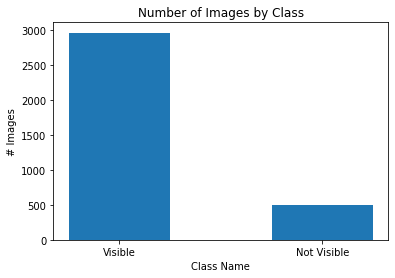

In [5]:
#Looking at the distribution of my classes (visible and not visible well pads)
imgClasses = {'Visible':len(padImagesFiles),'Not Visible':len(padImagesFiles2)}
plt.bar(imgClasses.keys(),imgClasses.values(),width=0.5);
plt.title('Number of Images by Class');
plt.xlabel('Class Name');
plt.ylabel('# Images');
plt.show()

There is definately imbalance in these catagories. I will now rotate and flip the Not Visible images to create more balance. If I don't do this the model will just predict visible and be right most of the time.

##Code to generate rotated versions of the Not_Visible class to rebalance the classes.Only run once.

In [6]:
#apparently keras.preprocessing requires an image format other than tif. This is a tool to convert my tif images to jpg.
#based on the concept of the code from https://thequickblog.com/convert-any-image-to-jpg-format-using-python/
'''from PIL import Image
def dirTif2JPG(dir,targetDir):
  imageFiles = [f for f in listdir(dir) if isfile(join(dir, f))]
  for i in imageFiles:
    test = i.split('.')
    if test[1] == 'tif':
      img = Image.open(dir+i)
      target_name = test[0] + ".jpg"
      rgb_image = img.convert('RGB')
      rgb_image.save(targetDir+target_name)
    else:
      pass
  return'''

'from PIL import Image\ndef dirTif2JPG(dir,targetDir):\n  imageFiles = [f for f in listdir(dir) if isfile(join(dir, f))]\n  for i in imageFiles:\n    test = i.split(\'.\')\n    if test[1] == \'tif\':\n      img = Image.open(dir+i)\n      target_name = test[0] + ".jpg"\n      rgb_image = img.convert(\'RGB\')\n      rgb_image.save(targetDir+target_name)\n    else:\n      pass\n  return'

In [7]:
#dirTif2JPG('gdrive/My Drive/wash250/not_visible/','gdrive/My Drive/wash250/not_visible2/')

In [8]:
#notVisFiles = [f for f in listdir('gdrive/My Drive/wash250/not_visible2/') if isfile(join('gdrive/My Drive/wash250/not_visible2/', f))]

In [9]:
#Based on https://docs.opencv.org/master/da/d6e/tutorial_py_geometric_transformations.html
'''for i in range(len(padImagesFiles2)):
  temp = cv.imread('gdrive/My Drive/wash250/not_visible/'+padImagesFiles2[i])
  rows,cols,chan = temp.shape
  c90 = cv.warpAffine(temp,cv.getRotationMatrix2D(((cols-1)/2,(rows-1)/2),90,1),(cols,rows))
  c90f = cv.flip(c90, 1)
  c180 = cv.warpAffine(temp,cv.getRotationMatrix2D(((cols-1)/2,(rows-1)/2),180,1),(cols,rows))
  c180f = cv.flip(c180, 1)
  cc90 = cv.warpAffine(temp,cv.getRotationMatrix2D(((cols-1)/2,(rows-1)/2),270,1),(cols,rows))
  cc90f = cv.flip(cc90, 1)
  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/c90/'+notVisFiles[i],c90)
  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/c180/'+notVisFiles[i],c180)
  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/cc90/'+notVisFiles[i],cc90)
  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/c90f/'+notVisFiles[i],c90f)
  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/c180f/'+notVisFiles[i],c180f)
  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/cc90f/'+notVisFiles[i],cc90f)'''

"for i in range(len(padImagesFiles2)):\n  temp = cv.imread('gdrive/My Drive/wash250/not_visible/'+padImagesFiles2[i])\n  rows,cols,chan = temp.shape\n  c90 = cv.warpAffine(temp,cv.getRotationMatrix2D(((cols-1)/2,(rows-1)/2),90,1),(cols,rows))\n  c90f = cv.flip(c90, 1)\n  c180 = cv.warpAffine(temp,cv.getRotationMatrix2D(((cols-1)/2,(rows-1)/2),180,1),(cols,rows))\n  c180f = cv.flip(c180, 1)\n  cc90 = cv.warpAffine(temp,cv.getRotationMatrix2D(((cols-1)/2,(rows-1)/2),270,1),(cols,rows))\n  cc90f = cv.flip(cc90, 1)\n  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/c90/'+notVisFiles[i],c90)\n  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/c180/'+notVisFiles[i],c180)\n  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/cc90/'+notVisFiles[i],cc90)\n  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/c90f/'+notVisFiles[i],c90f)\n  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/c180f/'+notVisFiles[i],c180f)\n  cv.imwrite('gdrive/My Drive/wash250/not_vis_mod/cc90f/'+notVisFiles[i],cc90f)"

##Add additional data to fix this imbalance through rotation/flipping not visible

In [10]:
c90Files = [f for f in listdir('gdrive/My Drive/wash250/not_vis_mod/c90/') if isfile(join('gdrive/My Drive/wash250/not_vis_mod/c90/', f))]
c180Files = [f for f in listdir('gdrive/My Drive/wash250/not_vis_mod/c180/') if isfile(join('gdrive/My Drive/wash250/not_vis_mod/c180/', f))]
cc90Files = [f for f in listdir('gdrive/My Drive/wash250/not_vis_mod/cc90/') if isfile(join('gdrive/My Drive/wash250/not_vis_mod/cc90/', f))]
c90fFiles = [f for f in listdir('gdrive/My Drive/wash250/not_vis_mod/c90f/') if isfile(join('gdrive/My Drive/wash250/not_vis_mod/c90f/', f))]
c180fFiles = [f for f in listdir('gdrive/My Drive/wash250/not_vis_mod/c180f/') if isfile(join('gdrive/My Drive/wash250/not_vis_mod/c180f/', f))]
cc90fFiles = [f for f in listdir('gdrive/My Drive/wash250/not_vis_mod/cc90f/') if isfile(join('gdrive/My Drive/wash250/not_vis_mod/cc90f/', f))]

In [11]:
print(len(c90Files))
print(len(c180Files))
print(len(cc90Files))
print(len(c90fFiles))
print(len(c180fFiles))
print(len(cc90fFiles))

400
400
400
400
400
400


In [12]:
modified=[]
for i in range(len(c90Files)):
  modified.append(c90Files[i])
for i in range(len(c180Files)):
  modified.append(c180Files[i])
for i in range(len(cc90Files)):
  modified.append(cc90Files[i])
for i in range(len(c90fFiles)):
  modified.append(c90fFiles[i])
for i in range(len(c180fFiles)):
  modified.append(c180fFiles[i])
for i in range(len(cc90fFiles)):
  modified.append(cc90fFiles[i])
len(modified)

2400

In [13]:
allNotVis = modified
for i in range(len(padImagesFiles2)):
  allNotVis.append(padImagesFiles2[i])
print(len(allNotVis))

2899


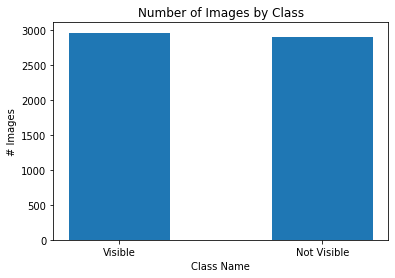

In [14]:
#Looking at the distribution of my classes now that I have added some rotations (visible and not visible well pads)
imgClasses = {'Visible':len(padImagesFiles),'Not Visible':len(allNotVis)}
plt.bar(imgClasses.keys(),imgClasses.values(),width=0.5);
plt.title('Number of Images by Class');
plt.xlabel('Class Name');
plt.ylabel('# Images');
plt.show()

Now that looks better on a balance!

##Loading dataframe with image data

In [15]:
#Build out additional dataframes to hold the modified images
wash_c90 = wash_head[wash_head['visible']==0]
wash_c180 = wash_c90
wash_cc90 = wash_c90
wash_c90f = wash_c90
wash_c180f = wash_c90
wash_cc90f = wash_c90
wash_head['rotation'] = 0
wash_head['flip'] = 0
wash_head['path'] = 'gdrive/My Drive/wash250/visible/'+wash_head['PERMIT_NUMBER'].map(str)+'.tif'
wash_head.loc[wash_head['visible'] ==0, 'path'] = 'gdrive/My Drive/wash250/not_visible/'+wash_head['PERMIT_NUMBER'].map(str)+'.jpg'
wash_c90['rotation'] = 90
wash_c90['flip'] = 0
wash_c90['path'] = 'gdrive/My Drive/wash250/not_vis_mod/cc90f/'+wash_c90['PERMIT_NUMBER'].map(str)+'.jpg'
wash_c180['rotation'] = 180
wash_c180['flip'] = 0
wash_c180['path'] = 'gdrive/My Drive/wash250/not_vis_mod/cc90f/'+wash_c180['PERMIT_NUMBER'].map(str)+'.jpg'
wash_cc90['rotation'] = 270
wash_cc90['flip'] = 0
wash_cc90['path'] = 'gdrive/My Drive/wash250/not_vis_mod/cc90f/'+wash_cc90['PERMIT_NUMBER'].map(str)+'.jpg'
wash_c90f['rotation'] = 90
wash_c90f['flip'] = 1
wash_c90f['path'] = 'gdrive/My Drive/wash250/not_vis_mod/cc90f/'+wash_c90f['PERMIT_NUMBER'].map(str)+'.jpg'
wash_c180f['rotation'] = 180
wash_c180f['flip'] = 1
wash_c180f['path'] = 'gdrive/My Drive/wash250/not_vis_mod/cc90f/'+wash_c180f['PERMIT_NUMBER'].map(str)+'.jpg'
wash_cc90f['rotation'] = 270
wash_cc90f['flip'] = 1
wash_cc90f['path'] = 'gdrive/My Drive/wash250/not_vis_mod/cc90f/'+wash_cc90f['PERMIT_NUMBER'].map(str)+'.jpg'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [16]:
wash_all = wash_head.append(wash_c90)
wash_all = wash_all.append(wash_c180)
wash_all = wash_all.append(wash_cc90)
wash_all = wash_all.append(wash_c90f)
wash_all = wash_all.append(wash_c180f)
wash_all = wash_all.append(wash_cc90f)
print(wash_all.shape)

(5759, 34)


In [17]:
#check that the filepath exists
import os
temp = []
for p in wash_all['path']:
  if os.path.isfile(p):
    pass
  else:
    temp.append(p)
print(len(temp))

301


In [18]:
wash_imgs = wash_all.loc[~wash_all['path'].isin(temp)]

In [19]:
#read in the images 
wash_imgs['image'] = wash_imgs['path'].map(lambda x: plt.imread(x)) # use the stored path to convert image to numpy array contianed within the df
wash_imgs.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PERMIT_NUMBER,X,Y,PERMIT_NUMBER.1,WELL_NAME,OPERATOR,OPERATOR_NUMBER,WELL_TYPE,WELL_STATUS,WELL_STATUS_CODE,PERMIT_DATE,SPUD_DATE,DATE_PLUGGED,CONSERVATION_IND,WELL_CONFIG_CODE,UNCONVENTIONAL_IND,COUNTY,COUNTY_ID,MUNICIPALITY,MUNICIPALITY_TYPE,MUNICIPALITY_CODE,LATITUDE,LONGITUDE,SURFACE_ELEVATION,WELL_PAD_ID,SITE_ID,SITE_NAME,OBJECTID,PERMIT_DATE_EXPIRES,visible,vintage,rotation,flip,path,image
0,3712500025,-8942494.737,4883347.958,3712500025,A L ASHBROOK (NOW) A D MOUNTS U328,PRESTON OIL CO,OGO-12613,UNDETERMINED,Plugged OG Well,15.0,1956/04/01 00:00:00+00,1800/01/01 00:00:00+00,NaN,N,Vertical Well,N,Washington,63.0,Buffalo,Twp,63916.0,40.119672,-80.331797,1236.0,0.0,228821.0,AL ASHBROOK NOW AD MT U328 WELL,539040.0,NaN,1.0,1800.0,0,0,gdrive/My Drive/wash250/visible/3712500025.tif,"[[[133, 146, 109, 144], [111, 133, 94, 153], [..."


In [20]:
#write thsi dataframe to file

#Not working yet
#pickle.dump(wash_imgs, 'gdrive/My Drive/Springboard_Capstone_3/wash_imgs.pickle')


wash_imgs.to_csv('gdrive/My Drive/Springboard_Capstone_3/wash_imgs.csv')

##DataFrame Reload if needed

In [21]:
#read dataframe from pickle
#wash_imgs = pickle.load(file('gdrive/My Drive/Springboard_Capstone_3/wash_imgs.csv', 'rb'))
#wash_imgs = pd.read_csv('gdrive/My Drive/Springboard_Capstone_3/wash_imgs.csv')

In [22]:
wash_imgs.head(1)

,PERMIT_NUMBER,X,Y,PERMIT_NUMBER.1,WELL_NAME,OPERATOR,OPERATOR_NUMBER,WELL_TYPE,WELL_STATUS,WELL_STATUS_CODE,PERMIT_DATE,SPUD_DATE,DATE_PLUGGED,CONSERVATION_IND,WELL_CONFIG_CODE,UNCONVENTIONAL_IND,COUNTY,COUNTY_ID,MUNICIPALITY,MUNICIPALITY_TYPE,MUNICIPALITY_CODE,LATITUDE,LONGITUDE,SURFACE_ELEVATION,WELL_PAD_ID,SITE_ID,SITE_NAME,OBJECTID,PERMIT_DATE_EXPIRES,visible,vintage,rotation,flip,path,image
0,3712500025,-8942494.737,4883347.958,3712500025,A L ASHBROOK (NOW) A D MOUNTS U328,PRESTON OIL CO,OGO-12613,UNDETERMINED,Plugged OG Well,15.0,1956/04/01 00:00:00+00,1800/01/01 00:00:00+00,NaN,N,Vertical Well,N,Washington,63.0,Buffalo,Twp,63916.0,40.119672,-80.331797,1236.0,0.0,228821.0,AL ASHBROOK NOW AD MT U328 WELL,539040.0,NaN,1.0,1800.0,0,0,gdrive/My Drive/wash250/visible/3712500025.tif,"[[[133, 146, 109, 144], [111, 133, 94, 153], [..."


#Investigation of the image data

##image shape

In [23]:
wash_imgs['w'] = wash_imgs.image.apply(lambda x: np.array(x).shape[0])
wash_imgs['h'] = wash_imgs.image.apply(lambda x: np.array(x).shape[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
print(wash_imgs.iloc[0].image.shape)
print(wash_imgs.iloc[0].w)
print(wash_imgs.iloc[0].h)

(84, 84, 4)
84
84


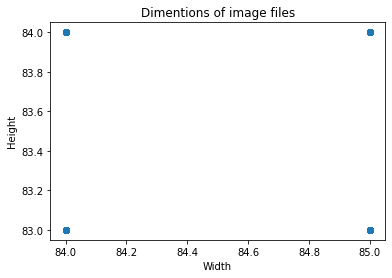

In [25]:
plt.scatter(wash_imgs['w'],wash_imgs['h'])
plt.title('Dimentions of image files');
plt.xlabel('Width');
plt.ylabel('Height');
plt.show()

It looks like for all files the width is either 83 or 84 and the height is either 84 or 85. I am going to reshape these prior to putting them into arrays for modeling.

##image colors

I want to see if the general colors of the different classification of images are consistent. To do this I am first going to look at the histograms of the differnt color bands.

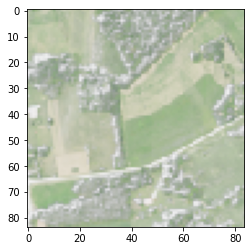

In [26]:
plt.imshow(wash_imgs.iloc[0].image)

In [44]:
#calculate the mean and standard deviation for each color for each image
df = pd.DataFrame(columns=['path','visible','r_mean','r_std','g_mean','g_std','b_mean','b_std'])
for i in range(len(wash_imgs)):
  path = wash_imgs.iloc[i].path
  vis = wash_imgs.iloc[i].visible
  img = plt.imread(path)
  r_mean = np.round(img[:,:,0].mean(),0)
  r_std = np.round(img[:,:,0].std(),0)
  g_mean = np.round(img[:,:,1].mean(),0)
  g_std = np.round(img[:,:,1].std(),0)
  b_mean = np.round(img[:,:,2].mean(),0)
  b_std = np.round(img[:,:,2].std(),0)
  temp = [path,vis,r_mean,r_std,g_mean,g_std,b_mean,b_std]
  tempdf = pd.DataFrame([temp],columns=['path','visible','r_mean','r_std','g_mean','g_std','b_mean','b_std'])
  df=df.append(tempdf,ignore_index=True)
df.head()

,path,visible,r_mean,r_std,g_mean,g_std,b_mean,b_std
0,gdrive/My Drive/wash250/visible/3712500025.tif,1.0,122.0,34.0,138.0,33.0,103.0,24.0
1,gdrive/My Drive/wash250/not_visible/3712500026...,0.0,108.0,33.0,124.0,34.0,92.0,28.0
2,gdrive/My Drive/wash250/visible/3712500027.tif,1.0,80.0,37.0,95.0,41.0,67.0,28.0
3,gdrive/My Drive/wash250/visible/3712500028.tif,1.0,117.0,36.0,128.0,39.0,100.0,27.0
4,gdrive/My Drive/wash250/visible/3712500035.tif,1.0,76.0,23.0,92.0,27.0,67.0,14.0


In [38]:
wash_imgs2 = wash_temp.join(df_temp)
wash_imgs2.head(1)

,PERMIT_NUMBER,X,Y,PERMIT_NUMBER.1,WELL_NAME,OPERATOR,OPERATOR_NUMBER,WELL_TYPE,WELL_STATUS,WELL_STATUS_CODE,PERMIT_DATE,SPUD_DATE,DATE_PLUGGED,CONSERVATION_IND,WELL_CONFIG_CODE,UNCONVENTIONAL_IND,COUNTY,COUNTY_ID,MUNICIPALITY,MUNICIPALITY_TYPE,MUNICIPALITY_CODE,LATITUDE,LONGITUDE,SURFACE_ELEVATION,WELL_PAD_ID,SITE_ID,SITE_NAME,OBJECTID,PERMIT_DATE_EXPIRES,visible,vintage,rotation,flip,image,w,h,r_mean,r_std,g_mean,g_std,b_mean,b_std
path,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gdrive/My Drive/wash250/not_vis_mod/cc90f/3712500026.jpg,3712500026,-8939583.175,4875449.422,3712500026,HUGH A DAY (PAUL DAY) U824,PRESTON OIL CO,OGO-12613,GAS,Plugged OG Well,15.0,NaN,1800/01/01 00:00:00+00,1957/09/27 00:00:00+00,N,Vertical Well,N,Washington,63.0,Morris,Twp,63943.0,40.065392,-80.305642,1185.0,0.0,228822.0,HUGH A DAY PAUL DAY U824 WELL,495577.0,NaN,0.0,1800.0,270,1,"[[[20, 25, 18], [26, 32, 22], [54, 60, 48], [4...",84,84,63.0,29.0,72.0,32.0,53.0,24.0


In [45]:
df['visible'].value_counts()

1.0    2959
0.0    2499
Name: visible, dtype: int64

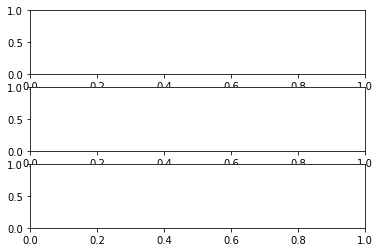

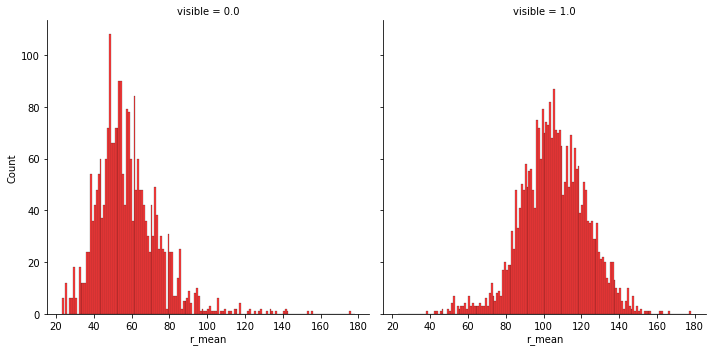

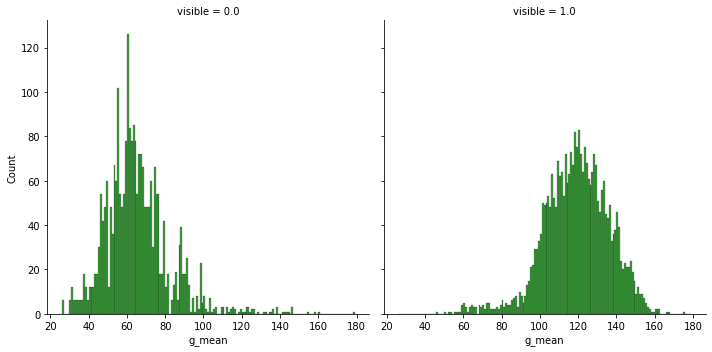

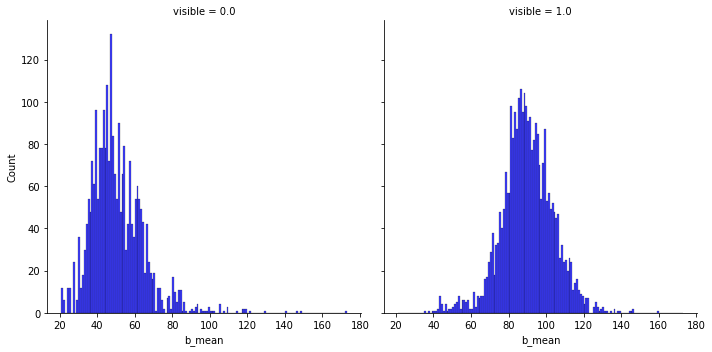

In [46]:
fig, ax = plt.subplots(nrows = 3, ncols=1)
ax[0] = sns.displot(df,x='r_mean',col='visible',binwidth=1,color='r')
ax[1] = sns.displot(df,x='g_mean',col='visible',binwidth=1,color='g')
ax[2] = sns.displot(df,x='b_mean',col='visible',binwidth=1,color='b')


It looks as though the not-visible pads have generally lower mean values for mean color intensities. 

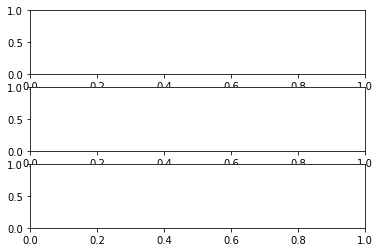

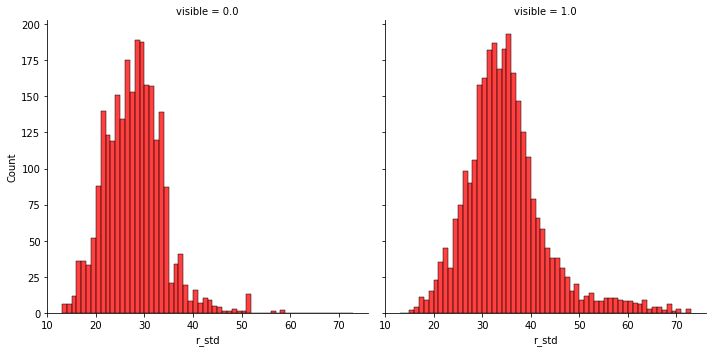

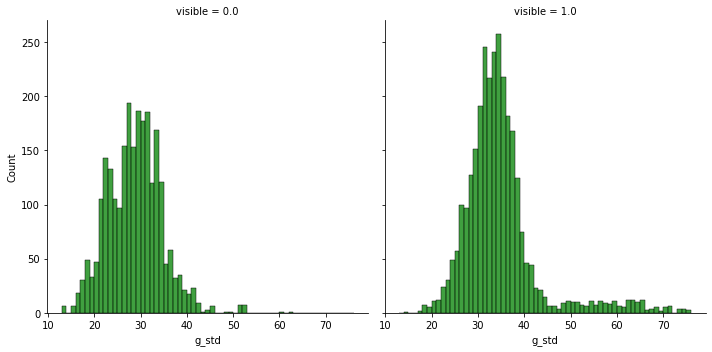

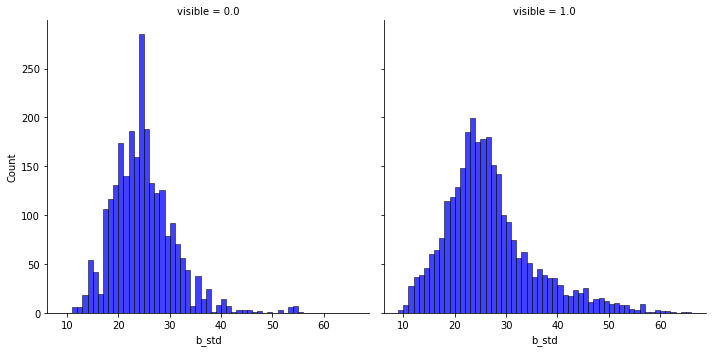

In [47]:
fig, ax = plt.subplots(nrows = 3, ncols=1)
ax[0] = sns.displot(df,x='r_std',col='visible',binwidth=1,color='r')
ax[1] = sns.displot(df,x='g_std',col='visible',binwidth=1,color='g')
ax[2] = sns.displot(df,x='b_std',col='visible',binwidth=1,color='b')


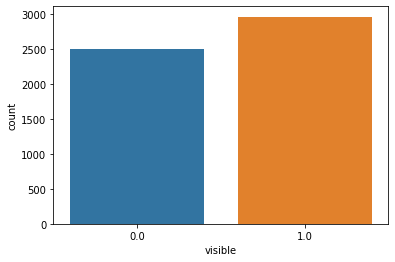

In [54]:
sns.countplot(data=df,x='visible',orient='v')

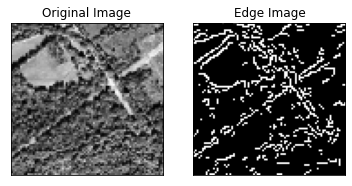

In [59]:
gray = cv.imread(df.iloc[12].path,0)
edges = cv.Canny(gray,180,230,apertureSize=3)
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

The edge detection seams to do a good job of highlighting linear features.

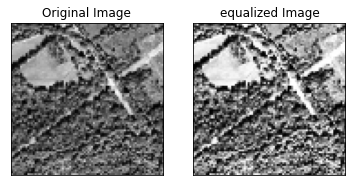

In [68]:
#what does and equalized grayscale image look like
#from https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html
equ = cv.equalizeHist(gray)
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(equ,cmap = 'gray')
plt.title('equalized Image'), plt.xticks([]), plt.yticks([])
plt.show()

To me equalization does not look like it changes this image too much

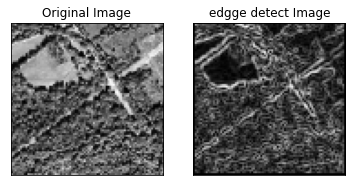

In [69]:
from skimage.filters import sobel
edge_sobel = sobel(gray)
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edge_sobel,cmap = 'gray')
plt.title('edgge detect Image'), plt.xticks([]), plt.yticks([])
plt.show()

Sobel looks like it does good at highlighting the edges of the lease roads/pipelines